In [ ]:
!python --version

Python 3.10.12


# Importando dados e bibliotecas
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
caminho_1 = ''

In [ ]:
df_1 = pd.read_csv(caminho_1)

In [ ]:
df_1.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_1 = df_1[df_1['Country'].isin(['Venezuela', 'Vietnam', 'Yemen', 'Yemen (Sanaa)',
                                 'Zambia', 'Zimbabwe', 'Albania', 'United Kingdom', 'United States', 'Uruguay'])]

In [ ]:
df_1.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Removendo aqui as colunas `Rst,Ground Dom. Consum` e `Soluble Dom. Cons.`

In [ ]:
df_1.columns

Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production',
       'Rst,Ground Dom. Consum', 'Soluble Dom. Cons.', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply'],
      dtype='object')

In [ ]:
colunas_dropar = ['Rst,Ground Dom. Consum', 'Soluble Dom. Cons.']

df_1 = df_1.drop(colunas_dropar, axis='columns')
df_1.columns

Index(['Country', 'Year', 'Arabica Production', 'Bean Exports', 'Bean Imports',
       'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Exports',
       'Imports', 'Other Production', 'Production', 'Roast & Ground Exports',
       'Roast & Ground Imports', 'Robusta Production', 'Soluble Exports',
       'Soluble Imports', 'Total Distribution', 'Total Supply'],
      dtype='object')

In [ ]:
df_1.columns = df_1.columns.str.replace(' ', '_').str.lower()
df_1.columns

Index(['country', 'year', 'arabica_production', 'bean_exports', 'bean_imports',
       'beginning_stocks', 'domestic_consumption', 'ending_stocks', 'exports',
       'imports', 'other_production', 'production', 'roast_&_ground_exports',
       'roast_&_ground_imports', 'robusta_production', 'soluble_exports',
       'soluble_imports', 'total_distribution', 'total_supply'],
      dtype='object')

# Calculando o consumo doméstico total (`Domestic Consumption`) para a Albania (`Country`) considerando todos os anos
---

In [ ]:
f'consumo doméstico total da albânia: {
    df_1[df_1.country == "Albania"].domestic_consumption.sum()}'

'consumo doméstico total da albânia: 1660'

# Calculando a variância da métrica `Bean Imports` para todos os países, excluindo o país Albania (`Country`)
---

In [ ]:
df_1[df_1.country != 'Albania'].groupby(df_1.country).bean_imports.var()

country
United Kingdom    7.926805e+05
United States     1.231576e+08
Uruguay           1.150546e+02
Venezuela         4.692100e+04
Vietnam           2.944852e+04
Yemen             0.000000e+00
Yemen (Sanaa)     0.000000e+00
Zambia            0.000000e+00
Zimbabwe          0.000000e+00
Name: bean_imports, dtype: float64

# Dentre os paises da coluna `Country`, encontrando qual deles apresentou a maior exportação de grãos (`Bean Exports`) no ano de 1992
---

In [ ]:
colunas = ['country', 'bean_exports']

df_1[df_1.year == 1992][colunas].max()

country         Zimbabwe
bean_exports        2175
dtype: object

# Analisando os dados referentes ao consumo interno de café no Zimbabwe entre 1990 e 2001
- Realizando o plot do gráfico temporal que mostra a evolução do índice `Domestic Consumption` durante esse período citado, no Zimbabwe
- Utilizando o Pandas Identifique o ano em que o consumo interno de café (`Domestic Consumption`) no Zimbabwe atingiu o valor máximo durante esse período
- Descrevendo o que você observei no gráfico com relação à tendência do consumo de café no Zimbabwe entre 1990 e 2001
---

In [ ]:
colunas = ['year', 'domestic_consumption']

df_questão_4 = df_1[(df_1.country == 'Zimbabwe') & (
    df_1.year >= 1992) & (df_1.year <= 2001)][colunas]
df_questão_4

,year,domestic_consumption
5984,1992,8
5985,1993,8
5986,1994,8
5987,1995,7
5988,1996,4
5989,1997,4
5990,1998,4
5991,1999,4
5992,2000,4
5993,2001,4


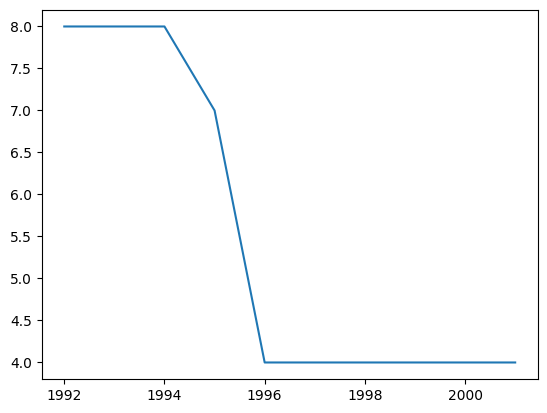

In [ ]:
plt.plot(df_questão_4.year, df_questão_4.domestic_consumption)

Considerações: entre 1994 e 1996 o consumo caiu pela metade e se manteve até o ano 2001 neste índice

# Plotando um gráfico temporal para analisar a tendência do índice `Domestic Consumption` durante o período de **2000 até 2008**, e em seguida mostrando o ano com o maior e também aquele com o menor consumo
---

In [ ]:
df_questão_5 = df_1[(df_1.year >= 2000) & (df_1.year <= 2008)]
df_questão_5.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [ ]:
df_questão_5_organizado = df_questão_5.groupby(
    df_questão_5.year)['domestic_consumption'].sum()
df_questão_5_organizado

year
2000     1463
2001     1389
2002    22479
2003    23487
2004    22950
2005    23855
2006    23557
2007    23671
2008    23826
Name: domestic_consumption, dtype: int64

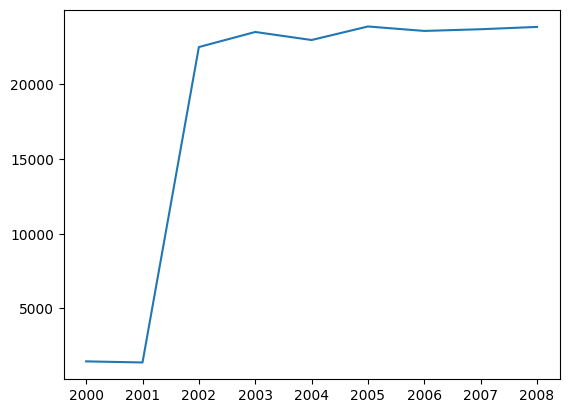

In [ ]:
plt.plot(df_questão_5_organizado.index, df_questão_5_organizado)

In [ ]:
f'ano com menor consumo: {df_questão_5_organizado.idxmin()}'

'ano com menor consumo: 2001'

In [ ]:
f'ano com maior consumo: {df_questão_5_organizado.idxmax()}'

'ano com maior consumo: 2005'